# Lista 5

### Zaimportowane biblioteki

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

### Zadanie 2

In [3]:
def autocov(xs, h=10):
    n = len(xs)
    autoc = 0
    xsMean = np.mean(xs)
    for i in range(n-h):
        autoc += (xs[i]-xsMean)*(xs[i+h]-xsMean)
    return autoc/n

def autocorr(xs, h=10):
    return autocov(xs, h)/autocov(xs, 0)

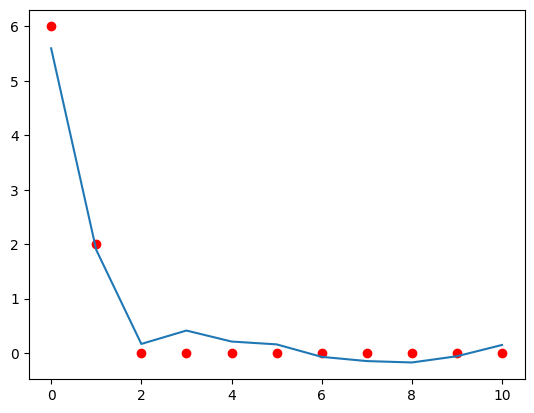

In [14]:
n = 1000
theta = 0.5
w = np.random.normal(0, 1, size=n)
sigma = 4
M = 100
theo = theta/(1+theta**2)
h=1
zs = np.random.normal(0, 2, size=n+1)
xs = []
for i in range(1, n+1):
    xs.append(zs[i]+theta*zs[i-1])

yt = xs+w

autocovs = []
for i in range(11):
    autocovs.append(autocov(yt, i))

plt.plot(np.arange(11), autocovs)
plt.scatter(0, (1+theta**2)*sigma+1,c='r')
plt.scatter(1, theta*sigma,c='r')
plt.scatter(np.arange(2,11,1), np.zeros(9),c='r')

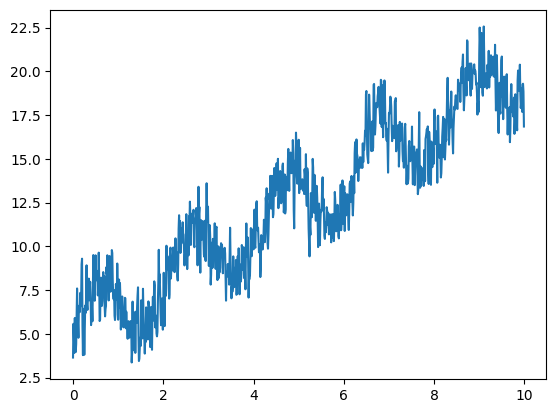

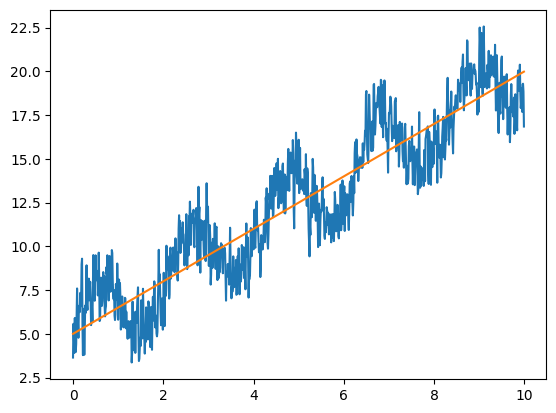

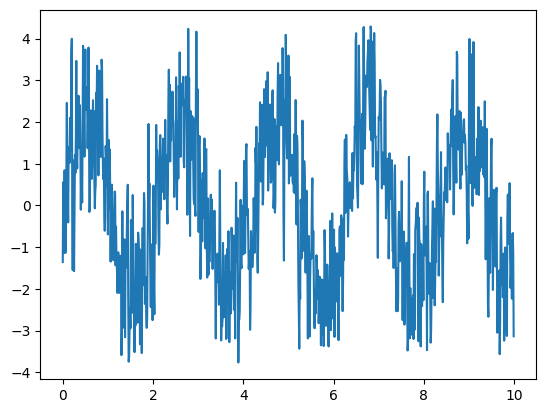

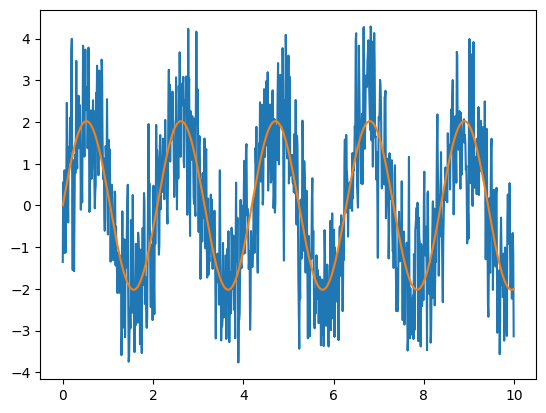

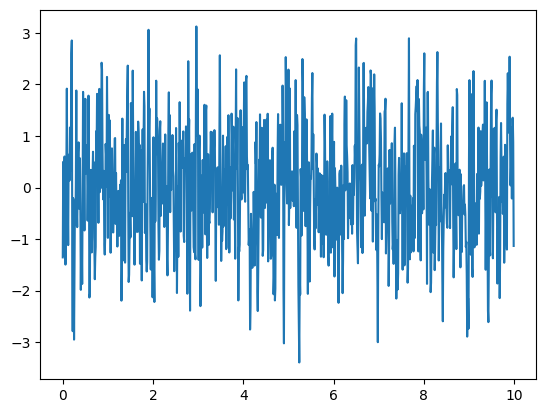

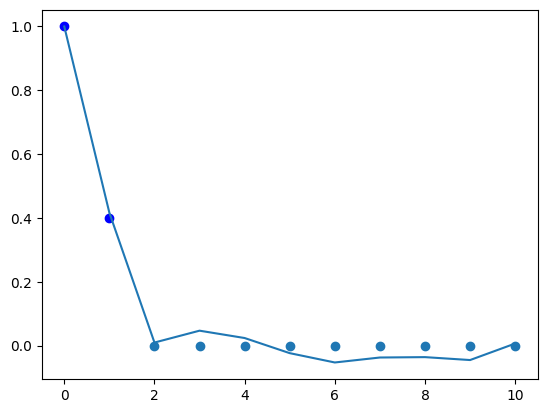

In [48]:
a1 = 1.5
a2 = 5
b1 = 2
b2 = 3
t = np.arange(0,10.00,0.01)
theta = 0.5
zs = np.random.normal(0, 1, size=n+1)
xs = []
for i in range(1, n+1):
    xs.append(zs[i]+theta*zs[i-1])

def m(t):
    return a1*t + a2
def s(t):
    return b1*np.sin(b2*t)
def y(t):
    return m(t) + s(t) + xs
def myFunc(t, b1, b2):
    return b1*np.sin(b2*t)
ys = y(t)
ms = m(t)
tMean = np.mean(t)
mMean = np.mean(ms)
plt.plot(t, y(t))
plt.show()
beta1 = np.sum((ms-mMean)*(t-tMean))/np.sum((t-tMean)**2)
beta0 = mMean - beta1*tMean
yHat = beta1*t +beta0
plt.plot(t, y(t))
plt.plot(t, yHat)
plt.show()
yStar = ys - yHat
plt.plot(t, yStar)
plt.show()
params = optimize.curve_fit(myFunc, t, yStar, p0 = [max(yStar), 2*np.pi/2.22])
plt.plot(t, yStar)
plt.plot(t, myFunc(t, params[0][0], params[0][1]))
plt.show()
yTwoStars = yStar - myFunc(t, params[0][0], params[0][1])
plt.plot(t, yTwoStars)
plt.show()
autocorrs = []
for i in range(11):
    autocorrs.append(autocorr(yTwoStars, i))

plt.plot(np.arange(11), autocorrs)
plt.scatter(0, 1, c='b')
plt.scatter(1, theta/(1+theta**2), c='b')
plt.scatter(np.arange(2,11,1), np.zeros(9))